# Principal Component Analysis with Cancer Data

In [1]:
# importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [2]:
# loading the dataset
df_data = pd.read_csv("breast-cancer-wisconsin-data.csv")

In [3]:
# checking the data loaded - top 10
df_data.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [331]:
# bottom 5
df_data.tail()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [4]:
# check the shape of the dataset
df_data.shape

(699, 11)

In [5]:
# checking for the columns
df_data.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [6]:
# checking the info
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           699 non-null    int64 
 1   ClumpThickness               699 non-null    int64 
 2   Cell Size                    699 non-null    int64 
 3   Cell Shape                   699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Normal Nucleoli              699 non-null    int64 
 8   Bland Chromatin              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [7]:
# statistical inference
df_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


In [336]:
# The dataset has 699 datapoints and 11 features
# All the columns are of the type int except for Bare Nuclei
# Though Bare Nuclei seems to be of int, it could be seen as object. This feature needs to be checked for any incorrect data.
# The range of the independent columns are in the range of 1-10
# The feature Mitoses seems to having mostly 75% as 1 but the max value is seen to be 10 hence there is the possibility of outliers
# Most of the other independent features too have higher range that may detect outliers.

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [8]:
# Checking for missing values
df_data.isnull().count()
#data.isna().count()

ID                             699
ClumpThickness                 699
Cell Size                      699
Cell Shape                     699
Marginal Adhesion              699
Single Epithelial Cell Size    699
Bare Nuclei                    699
Normal Nucleoli                699
Bland Chromatin                699
Mitoses                        699
Class                          699
dtype: int64

In [9]:
# There seems to be no null values
# The feature Bare Nuclei was seen to be in object datatype, though it has int. This is because of the presence of '?'
# Need to treat the feature Bare Nuclei

In [10]:
# checking the number of columns with '?' '
print("There are", len(df_data[df_data['Bare Nuclei']=='?']) , "datapoints with '?' in the Bare Nuclei feature.")

There are 16 datapoints with '?' in the Bare Nuclei feature.


In [11]:
#imputing the values of the datapoints with mode
df_data['Bare Nuclei'].replace("?",'1', inplace=True)

In [12]:
# checking if still the '?' exists
len(df_data[df_data['Bare Nuclei']=='?'])

0

In [13]:
# converting the datatype now of the column
df_data['Bare Nuclei'] = df_data['Bare Nuclei'].astype('int64')

In [14]:
#removing the ID column
df_data = df_data.drop('ID', axis=1)

In [15]:
df_data.shape

(699, 10)

In [16]:
# checking for any duplicate values
df_data[df_data.duplicated()].shape

(242, 10)

In [17]:
# dropping the duplicates
df_data = df_data.drop_duplicates()

In [18]:
#checking the datatypes of the columns now
df_data.dtypes

ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

In [19]:
# shape of the dataset after the above steps
df_data.shape

(457, 10)

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [20]:
# Check for correlation of variable
df_data.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.572961,0.585051,0.376395,0.424863,0.505154,0.490478,0.444999,0.293701,0.671929
Cell Size,0.572961,1.000000,0.876257,0.636158,0.686596,0.584168,0.710696,0.653571,0.401360,0.754380
Cell Shape,0.585051,0.876257,1.000000,0.608572,0.645747,0.610110,0.685179,0.651476,0.379111,0.755177
Marginal Adhesion,0.376395,0.636158,0.608572,1.000000,0.523539,0.586841,0.608256,0.509574,0.355714,0.618088
Single Epithelial Cell Size,0.424863,0.686596,0.645747,0.523539,1.000000,0.477419,0.550626,0.554593,0.432699,0.600130
Bare Nuclei,0.505154,0.584168,0.610110,0.586841,0.477419,1.000000,0.600113,0.466019,0.263617,0.756300
Normal Nucleoli,0.490478,0.710696,0.685179,0.608256,0.550626,0.600113,1.000000,0.604270,0.276981,0.704781
Bland Chromatin,0.444999,0.653571,0.651476,0.509574,0.554593,0.466019,0.604270,1.000000,0.367106,0.636002
Mitoses,0.293701,0.401360,0.379111,0.355714,0.432699,0.263617,0.276981,0.367106,1.000000,0.357504
Class,0.671929,0.754380,0.755177,0.618088,0.600130,0.756300,0.704781,0.636002,0.357504,1.000000


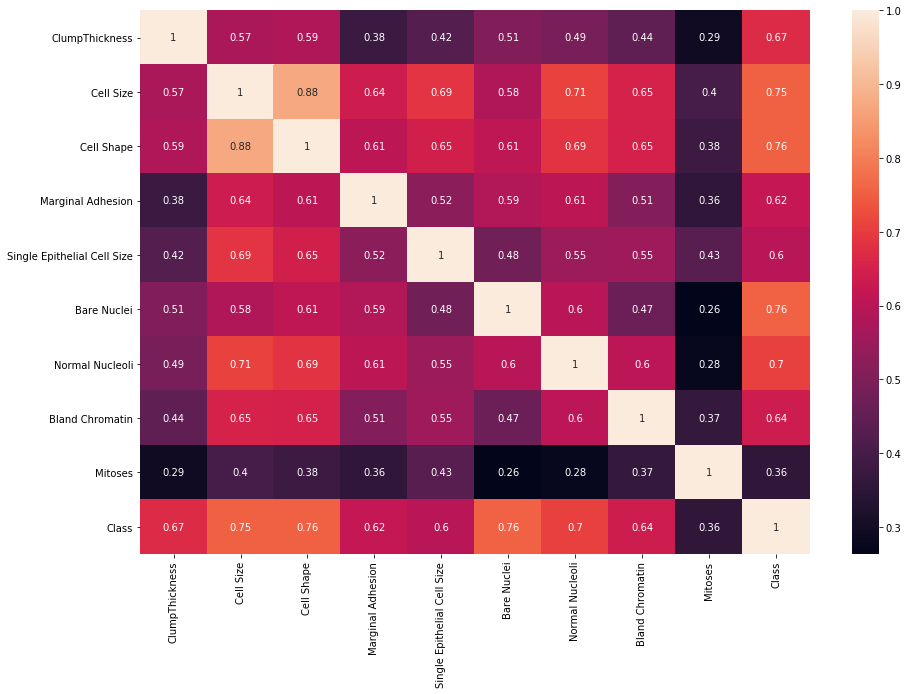

In [21]:
# Checking the heatmap for the data
plt.figure(figsize=(15,10))
sns.heatmap(df_data.corr(), annot=True)
plt.show()

In [22]:
# The multicollinearity among the attribures attributes Cell Size, Cell Shape, Marginal Adhesion, Single Epithelial Cell Size,Bare Nuclei, Normal Nucleoli and Bland Chromatin is high.
# Target attribute has a good relationship with almost all the independent variables except for the Mitoses.

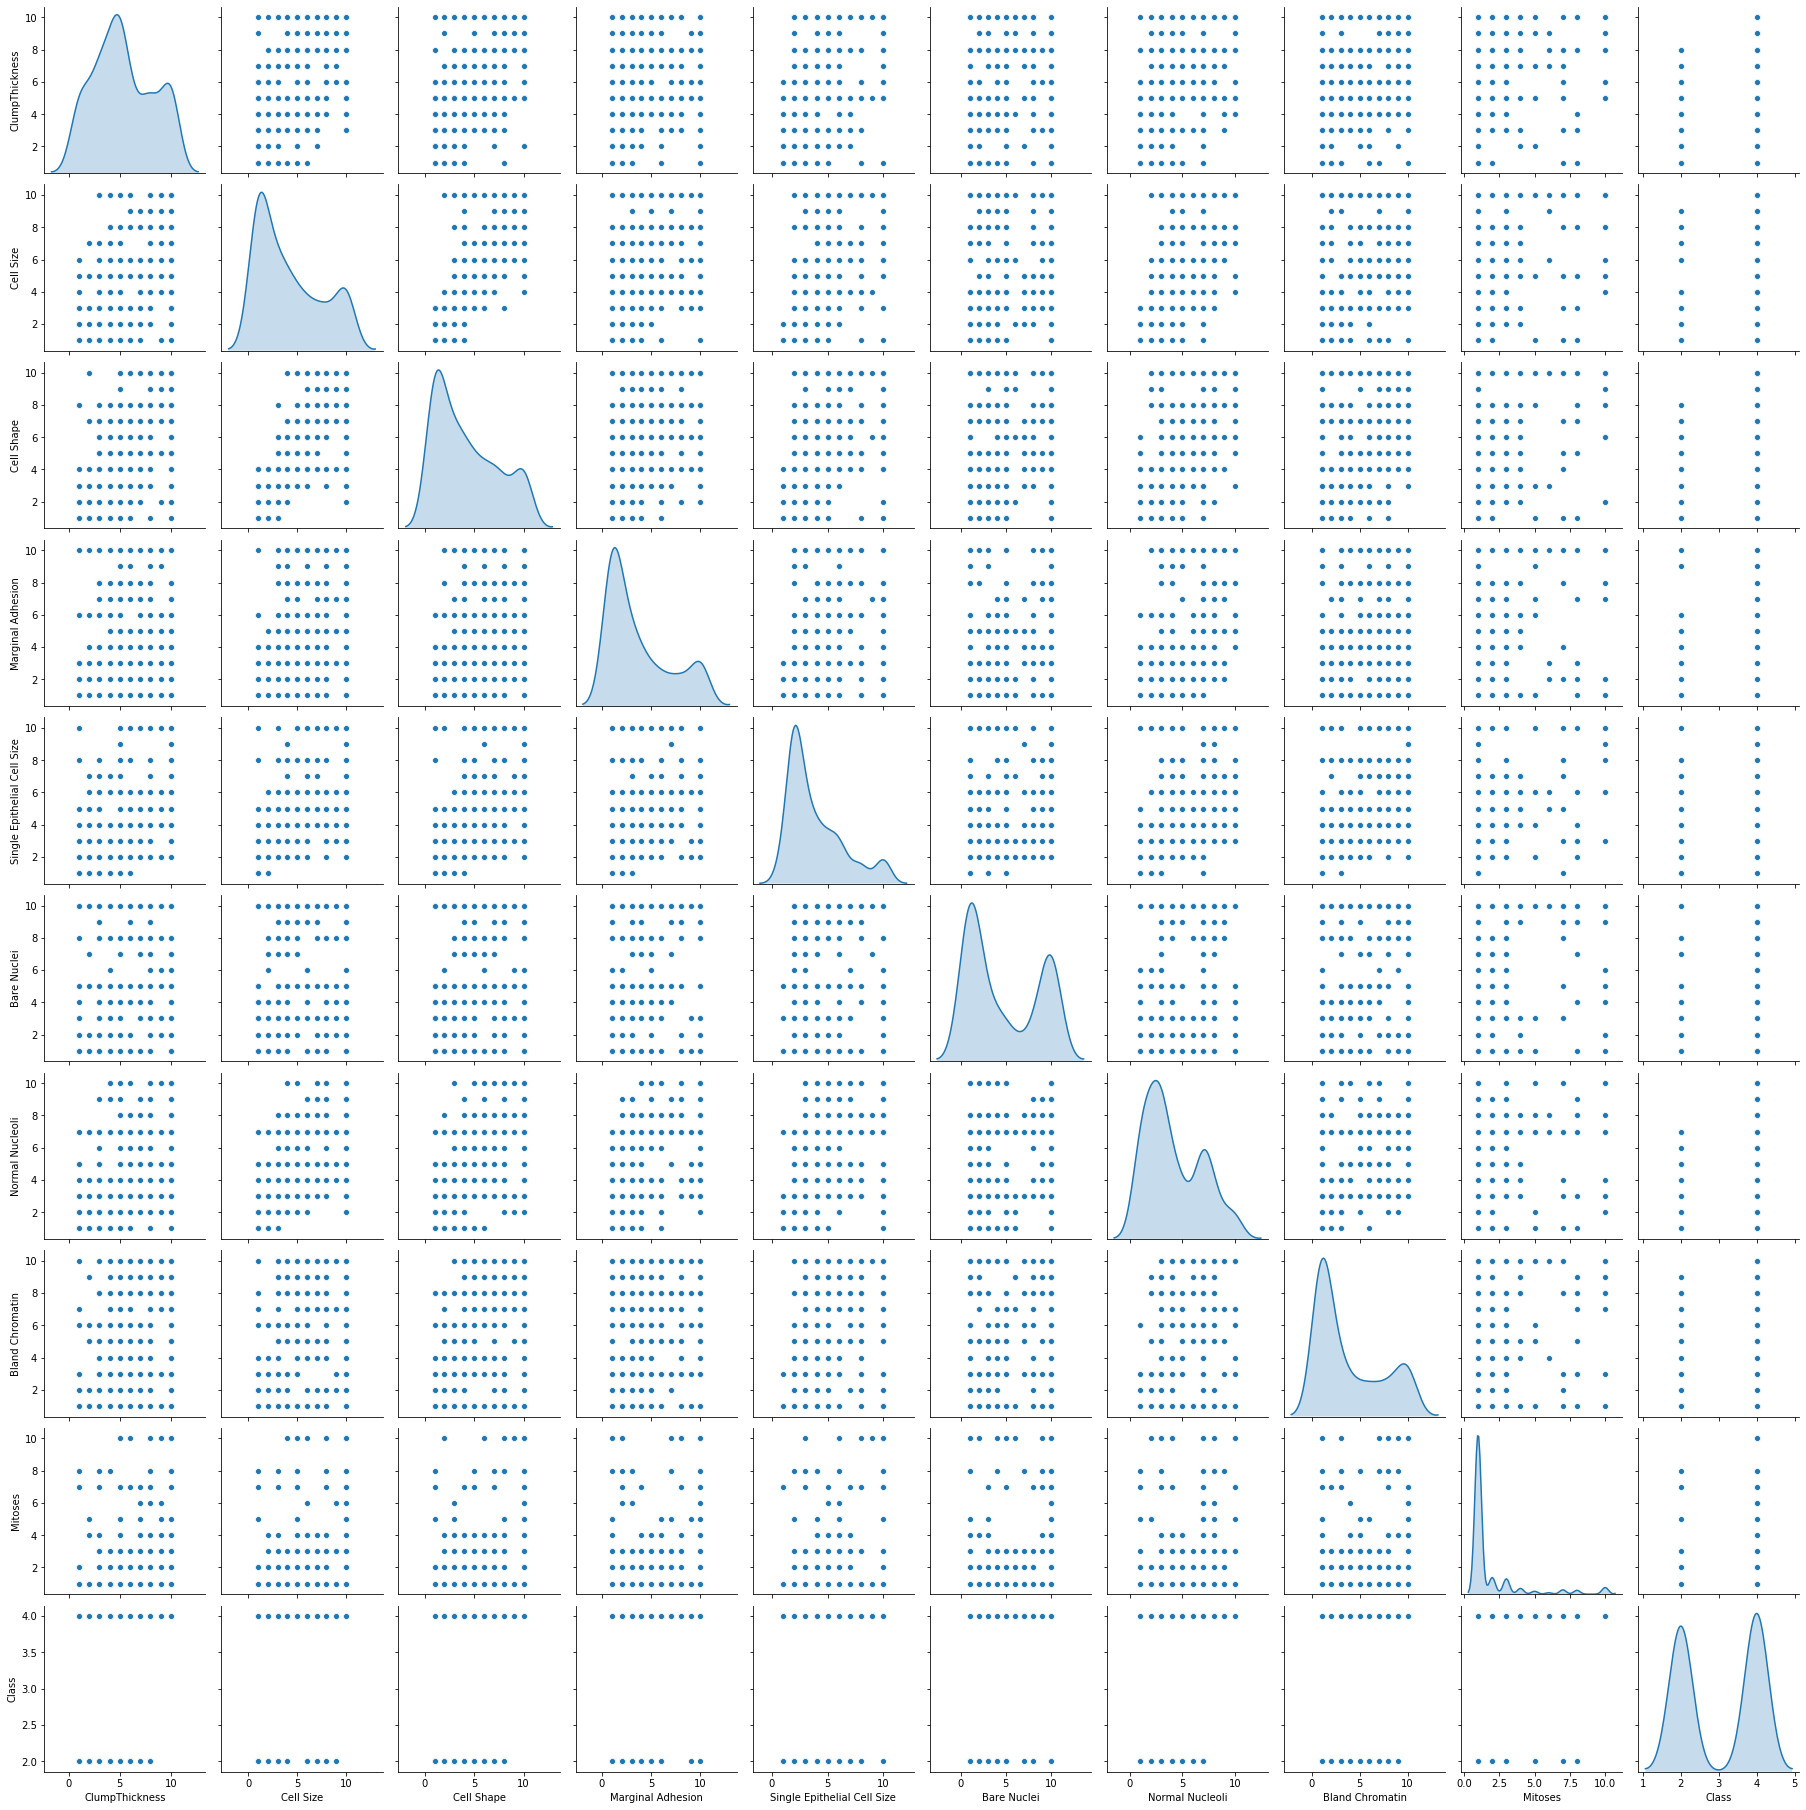

In [23]:
# Check for correlation of variable
sns.pairplot(df_data, diag_kind='kde')
plt.show()

In [24]:
# The attribute Mitoses is highly right skewed.

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

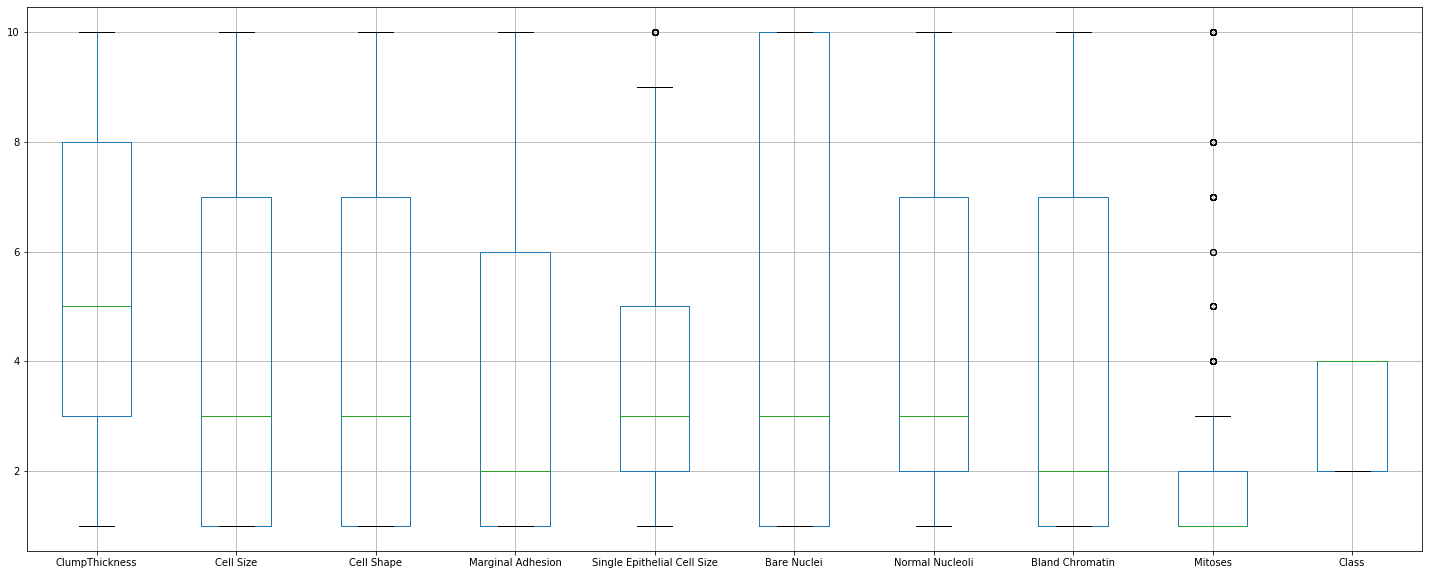

In [25]:
# checking for the outliers
plt.figure(figsize=(25,10))
df_data.boxplot()
plt.show()

In [26]:
# checking the interquartile range
Q3 = df_data.quantile(0.75)
Q1 = df_data.quantile(0.25)
IQR = Q3 - Q1
IQR

ClumpThickness                 5.0
Cell Size                      6.0
Cell Shape                     6.0
Marginal Adhesion              5.0
Single Epithelial Cell Size    3.0
Bare Nuclei                    9.0
Normal Nucleoli                5.0
Bland Chromatin                6.0
Mitoses                        1.0
Class                          2.0
dtype: float64

In [27]:
# checking which attributes have the outliers
((df_data < (Q1 - 1.5 * IQR))|(df_data > (Q3 + 1.5 * IQR))).sum()

ClumpThickness                  0
Cell Size                       0
Cell Shape                      0
Marginal Adhesion               0
Single Epithelial Cell Size    30
Bare Nuclei                     0
Normal Nucleoli                 0
Bland Chromatin                 0
Mitoses                        52
Class                           0
dtype: int64

In [28]:
# there are outliers for the attributes Single Epithelial Cell Size and Mitoses

In [29]:
# applying log transformation to the dataset
df_data_logTransformed  = np.log(df_data.drop('Class', axis=1))

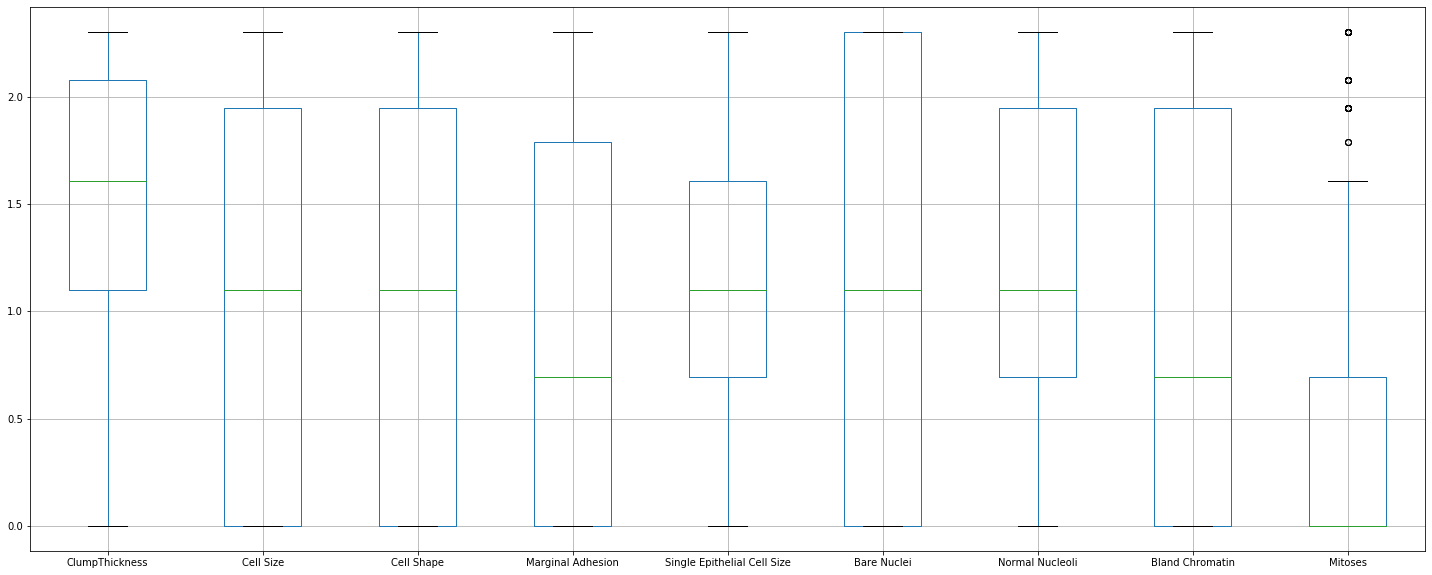

In [30]:
plt.figure(figsize=(25,10))
df_data_logTransformed.boxplot()
plt.show()

In [31]:
Q3_log_trasnf = df_data_logTransformed.quantile(0.75)
Q1_log_transf = df_data_logTransformed.quantile(0.25)
IQR_log_transf  = Q3_log_trasnf - Q1_log_transf
IQR_log_transf 

ClumpThickness                 0.980829
Cell Size                      1.945910
Cell Shape                     1.945910
Marginal Adhesion              1.791759
Single Epithelial Cell Size    0.916291
Bare Nuclei                    2.302585
Normal Nucleoli                1.252763
Bland Chromatin                1.945910
Mitoses                        0.693147
dtype: float64

In [32]:
((df_data_logTransformed < (Q1_log_transf - 1.5 * IQR_log_transf))|(df_data_logTransformed > (Q3_log_trasnf + 1.5 * IQR_log_transf))).sum()

ClumpThickness                  0
Cell Size                       0
Cell Shape                      0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                     0
Normal Nucleoli                 0
Bland Chromatin                 0
Mitoses                        34
dtype: int64

In [33]:
# still we see the presence of outliers for the feature Mitoses.

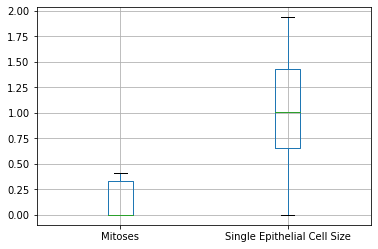

In [34]:
# Checking now by applying the boxcox transformation to Mitoses and Single Epithelial Cell Size attributes
df_boxcox = pd.DataFrame(index=df_data.index)
df_boxcox['Mitoses'] = stats.boxcox(df_data['Mitoses'])[0]
df_boxcox['Single Epithelial Cell Size'] = stats.boxcox(df_data['Single Epithelial Cell Size'])[0]
df_boxcox.boxplot()
plt.show()

In [35]:
# assigning the transformed feature to the main dataset
df_data['Mitoses'] = df_boxcox['Mitoses'] 
df_data['Single Epithelial Cell Size'] = df_boxcox['Single Epithelial Cell Size']

In [36]:
# now standardizing the dataset
df_std_data = df_data.drop('Class', axis=1).apply(zscore)

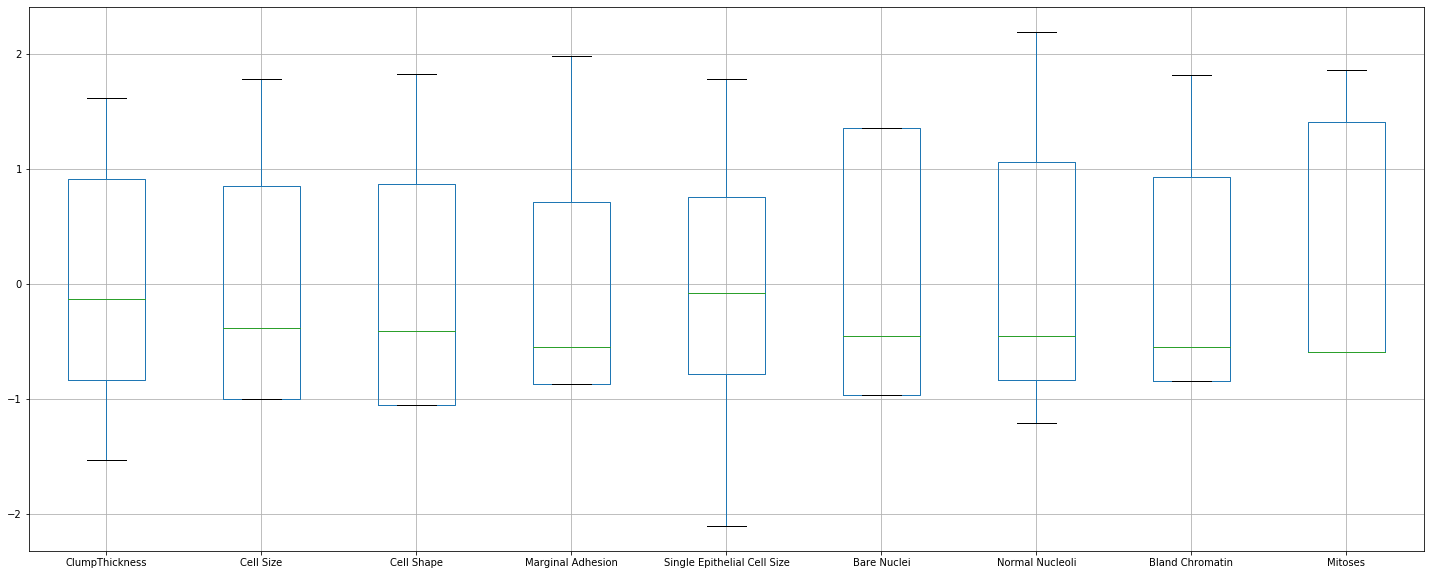

In [37]:
# checking all the columns now for the transformed dataset
plt.figure(figsize=(25,10))
df_std_data.boxplot()
plt.show()

In [38]:
# outliers are treated now for the dataset

# Q6 Create a covariance matrix for identifying Principal components

In [39]:
# PCA
# Step 1 - Create covariance matrix
df_data_cov = np.cov(df_std_data.T)

In [40]:
df_data_cov

array([[1.00219298, 0.57421719, 0.58633441, 0.37722037, 0.47488308,
        0.50626202, 0.49155392, 0.44597517, 0.3719744 ],
       [0.57421719, 1.00219298, 0.87817812, 0.63755341, 0.71800723,
        0.58544869, 0.71225418, 0.65500437, 0.41700331],
       [0.58633441, 0.87817812, 1.00219298, 0.60990617, 0.68413729,
        0.61144829, 0.68668149, 0.65290503, 0.38191481],
       [0.37722037, 0.63755341, 0.60990617, 1.00219298, 0.56356155,
        0.58812775, 0.60959039, 0.51069197, 0.38072687],
       [0.47488308, 0.71800723, 0.68413729, 0.56356155, 1.00219298,
        0.54864509, 0.59575988, 0.60608426, 0.40023097],
       [0.50626202, 0.58544869, 0.61144829, 0.58812775, 0.54864509,
        1.00219298, 0.60142926, 0.46704112, 0.37264937],
       [0.49155392, 0.71225418, 0.68668149, 0.60959039, 0.59575988,
        0.60142926, 1.00219298, 0.60559498, 0.30617398],
       [0.44597517, 0.65500437, 0.65290503, 0.51069197, 0.60608426,
        0.46704112, 0.60559498, 1.00219298, 0.41683016],


# Q7 Identify eigen values and eigen vector

In [41]:
# Step 2- Get eigen values and eigen vector

In [42]:
df_data_eigen_val, df_data_eigen_vec = np.linalg.eig(df_data_cov)

In [43]:
# eigen values
df_data_eigen_val

array([5.44434592, 0.78193752, 0.11723734, 0.64089521, 0.59242685,
       0.31122102, 0.33451462, 0.38625214, 0.41090623])

In [44]:
# eigen vectors
df_data_eigen_vec

array([[-0.29364546,  0.16782024,  0.00943653,  0.83006208, -0.07852005,
         0.1495925 ,  0.35267129, -0.20225668, -0.05185052],
       [-0.38598249, -0.12556118,  0.73327147,  0.03051727,  0.19662791,
        -0.23561023, -0.30270193, -0.22553091,  0.24487995],
       [-0.38097029, -0.15510567, -0.66146741,  0.10188215,  0.16829822,
        -0.44053938, -0.30702406, -0.16538566,  0.19715309],
       [-0.32592996, -0.10827332, -0.03877416, -0.4599702 , -0.40106197,
        -0.00776673,  0.49654518, -0.50716924,  0.06543508],
       [-0.34721127, -0.04583673, -0.07471648, -0.11603096,  0.22873276,
         0.42474004,  0.2305793 ,  0.45975367,  0.60086152],
       [-0.32473298, -0.04785166,  0.08831267,  0.05527088, -0.65784429,
        -0.28879117, -0.08794559,  0.58401802, -0.12819435],
       [-0.34989101, -0.28616625, -0.07875736, -0.05405132, -0.05175257,
         0.63562292, -0.42970724, -0.10393012, -0.42943717],
       [-0.33114809,  0.03157698,  0.04167771, -0.16970287,  0

# Q8 Find variance and cumulative variance by each eigen vector

In [45]:
# Finding the variance
tot = sum(df_data_eigen_val)
var_exp = [( i /tot ) * 100 for i in sorted(df_data_eigen_val, reverse=True)]
print('Variance Explained', var_exp)

Variance Explained [60.36036317143416, 8.669183298132575, 7.1054756986780445, 6.568116803419481, 4.5556343400524755, 4.282299431083804, 3.7086960002980534, 3.4504445149700502, 1.2997867419313576]


In [46]:
#finding the cumulative variance
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 60.36036317  69.02954647  76.13502217  82.70313897  87.25877331
  91.54107274  95.24976874  98.70021326 100.        ]


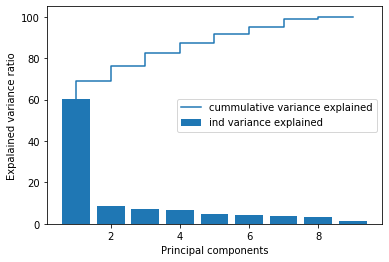

In [47]:
# visualizing the variance in the plot
plt.bar(range(1,10),var_exp,align='center', label='ind variance explained')
plt.step(range(1,10), cum_var_exp, label = 'cummulative variance explained')
plt.xlabel('Principal components')
plt.ylabel('Expalained variance ratio')
plt.legend(loc='best')
plt.show()

In [48]:
# the first 7 components almost decribes the 95% of the data

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [49]:
# building model for 7 components
pca = PCA(n_components=7)

In [51]:
# getting the transformed dataset
data_pca =  pca.fit_transform(df_std_data)
data_pca

array([[-2.26357059,  0.00574467, -0.47562653, ..., -0.16517861,
        -0.17091498,  0.07664099],
       [ 0.4385665 , -0.59301165,  0.14125739, ...,  1.09971489,
         1.18771463,  0.50982008],
       [-2.38520747, -0.12402314,  0.0908689 , ..., -0.16198842,
         0.1213336 , -0.19280811],
       ...,
       [ 3.00892031,  0.3936759 ,  0.60018814, ..., -0.06413283,
        -0.06052047, -1.21022365],
       [ 1.30214697, -1.4571841 ,  0.45597062, ..., -0.90101208,
        -0.4847211 , -1.21265307],
       [ 1.70345311, -1.64376749,  0.47731719, ..., -0.16055212,
        -0.52102128, -1.38562455]])

In [52]:
# pca components 
pca.components_

array([[ 0.29364546,  0.38598249,  0.38097029,  0.32592996,  0.34721127,
         0.32473298,  0.34989101,  0.33114809,  0.23522588],
       [ 0.16782024, -0.12556118, -0.15510567, -0.10827332, -0.04583673,
        -0.04785166, -0.28616625,  0.03157698,  0.91269429],
       [-0.83006208, -0.03051727, -0.10188215,  0.4599702 ,  0.11603096,
        -0.05527088,  0.05405132,  0.16970287,  0.19968578],
       [-0.07852005,  0.19662791,  0.16829822, -0.40106197,  0.22873276,
        -0.65784429, -0.05175257,  0.52632785, -0.03492788],
       [-0.05185052,  0.24487995,  0.19715309,  0.06543508,  0.60086152,
        -0.12819435, -0.42943717, -0.57642339, -0.0067581 ],
       [-0.20225668, -0.22553091, -0.16538566, -0.50716924,  0.45975367,
         0.58401802, -0.10393012,  0.23584295, -0.0691458 ],
       [ 0.35267129, -0.30270193, -0.30702406,  0.49654518,  0.2305793 ,
        -0.08794559, -0.42970724,  0.37390324, -0.24045878]])

In [53]:
df_data_pca = pd.DataFrame(data_pca)
df_data_pca.head()

,0,1,2,3,4,5,6
0,-2.263571,0.005745,-0.475627,0.043404,-0.165179,-0.170915,0.076641
1,0.438566,-0.593012,0.141257,-1.024445,1.099715,1.187715,0.509820
2,-2.385207,-0.124023,0.090869,-0.071451,-0.161988,0.121334,-0.192808
3,0.612581,-0.568747,-0.720704,1.403470,0.094494,0.095058,-0.386202
4,-2.159635,-0.121616,0.106406,-0.183427,-0.105550,-0.421738,0.268109


# Q10 Find correlation between components and features

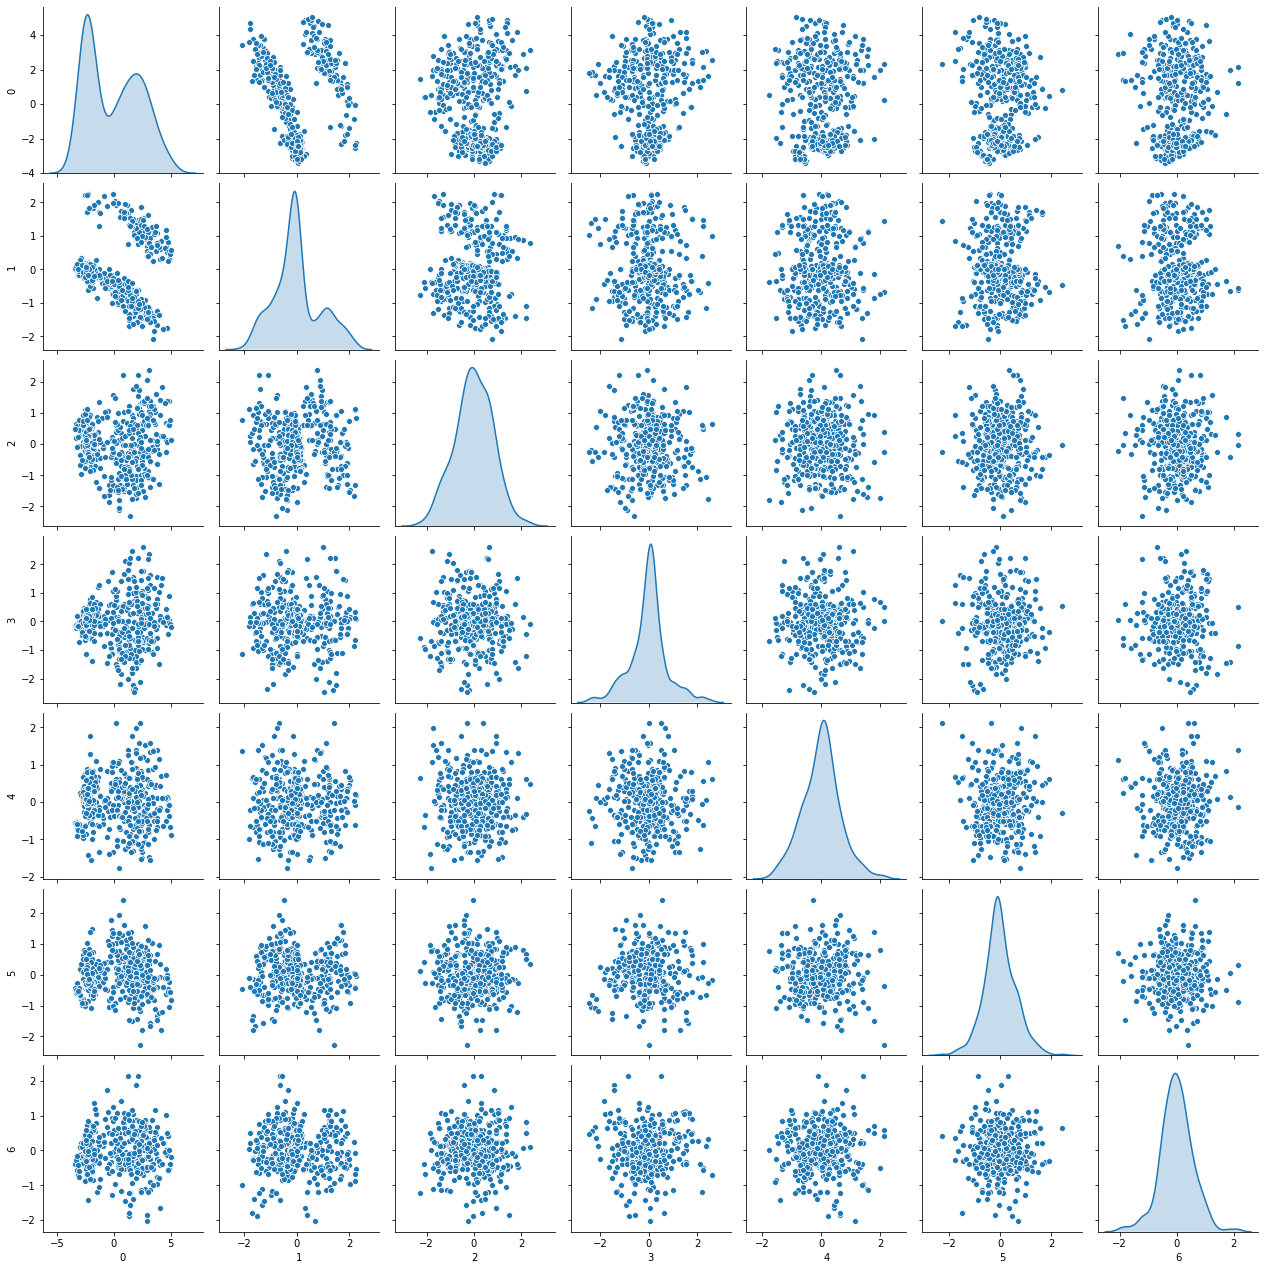

In [54]:
#checking the pairplot for the distribution
sns.pairplot(df_data_pca, diag_kind='kde')
plt.show()

In [55]:
# the first component seems to be with the maximun information hence could observe the data distribution also the peaks.
# the pca components attributes are now not having much correlation.

In [56]:
# combining the pca components to the
df_data_comp = pd.DataFrame(pca.components_,columns=list(df_std_data))
df_data_comp.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.293645,0.385982,0.380970,0.325930,0.347211,0.324733,0.349891,0.331148,0.235226
1,0.167820,-0.125561,-0.155106,-0.108273,-0.045837,-0.047852,-0.286166,0.031577,0.912694
2,-0.830062,-0.030517,-0.101882,0.459970,0.116031,-0.055271,0.054051,0.169703,0.199686
3,-0.078520,0.196628,0.168298,-0.401062,0.228733,-0.657844,-0.051753,0.526328,-0.034928
4,-0.051851,0.244880,0.197153,0.065435,0.600862,-0.128194,-0.429437,-0.576423,-0.006758


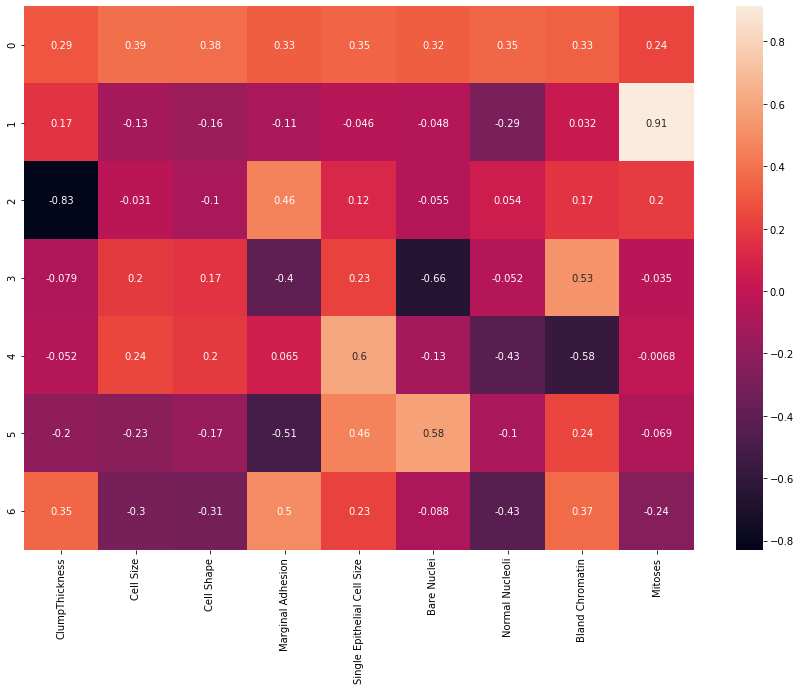

In [57]:
# checking the correlation
plt.figure(figsize=(15,10))
sns.heatmap(df_data_comp, annot = True)
plt.show()

In [58]:
# The first component has the maximun of all the features extracted
# Certain components are having strong influence on certain features.
# This will help to label the components to corresponding features